In [60]:
#!pip install xgboost

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_absolute_error, mean_squared_error, r2_score, confusion_matrix
from imblearn.over_sampling import SMOTE

In [8]:
# Load the dataset
df = pd.read_csv('./diabetes.csv')

In [37]:
df.columns

Index(['Age', 'Gender', 'Ethnicity', 'Income', 'BMI', 'Blood_Pressure',
       'Cholesterol', 'Exercise_Hours_Per_Week',
       'Alcohol_Consumption_Per_Week', 'Smoking_Status',
       'Family_History_Diabetes', 'Glucose_Level', 'HbA1c',
       'Insulin_Resistance', 'Heart_Disease_History',
       'Physical_Activity_Level', 'Fast_Food_Intake_Per_Week',
       'Processed_Food_Intake_Per_Week', 'Daily_Caloric_Intake',
       'Sleep_Hours_Per_Night', 'Stress_Level', 'Medication_Use',
       'Diabetes_Diagnosis'],
      dtype='object')

In [41]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,53.398700,20.799006,18.0,35.0,53.0,71.00,89.0
Gender,50000.0,0.498280,0.500002,0.0,0.0,0.0,1.00,1.0
Ethnicity,50000.0,2.002980,1.412647,0.0,1.0,2.0,3.00,4.0
Income,50000.0,85176.555140,37574.185279,20000.0,52551.0,85355.5,117782.75,149997.0
BMI,50000.0,31.818748,7.637138,18.5,25.2,31.8,38.40,45.0
Blood_Pressure,50000.0,135.080956,26.039637,90.0,112.4,135.2,157.60,180.0
Cholesterol,50000.0,200.185024,57.737684,100.0,150.4,200.3,250.30,300.0
Exercise_Hours_Per_Week,50000.0,4.991036,2.882748,0.0,2.5,5.0,7.50,10.0
Alcohol_Consumption_Per_Week,50000.0,7.004840,4.324922,0.0,3.0,7.0,11.00,14.0
Smoking_Status,50000.0,1.007380,0.817128,0.0,0.0,1.0,2.00,2.0


In [12]:
# Check for missing values
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 Age                               0
Gender                            0
Ethnicity                         0
Income                            0
BMI                               0
Blood_Pressure                    0
Cholesterol                       0
Exercise_Hours_Per_Week           0
Alcohol_Consumption_Per_Week      0
Smoking_Status                    0
Family_History_Diabetes           0
Glucose_Level                     0
HbA1c                             0
Insulin_Resistance                0
Heart_Disease_History             0
Physical_Activity_Level           0
Fast_Food_Intake_Per_Week         0
Processed_Food_Intake_Per_Week    0
Daily_Caloric_Intake              0
Sleep_Hours_Per_Night             0
Stress_Level                      0
Medication_Use                    0
Diabetes_Diagnosis                0
dtype: int64


In [14]:
# Encode categorical variables
categorical_cols = ['Gender', 'Ethnicity', 'Smoking_Status', 'Physical_Activity_Level', 'Stress_Level']
label_encoders = {}

In [16]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le  # Store encoders for later use

In [18]:
# Define features and targets
X = df.drop(columns=['Diabetes_Diagnosis', 'Glucose_Level'])  # Features
y_classification = df['Diabetes_Diagnosis']  # Target for classification
y_regression = df['Glucose_Level']  # Target for regression

In [20]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [64]:
# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y_classification)

## Correlation Heatmap (with Mask for Upper Triangle)

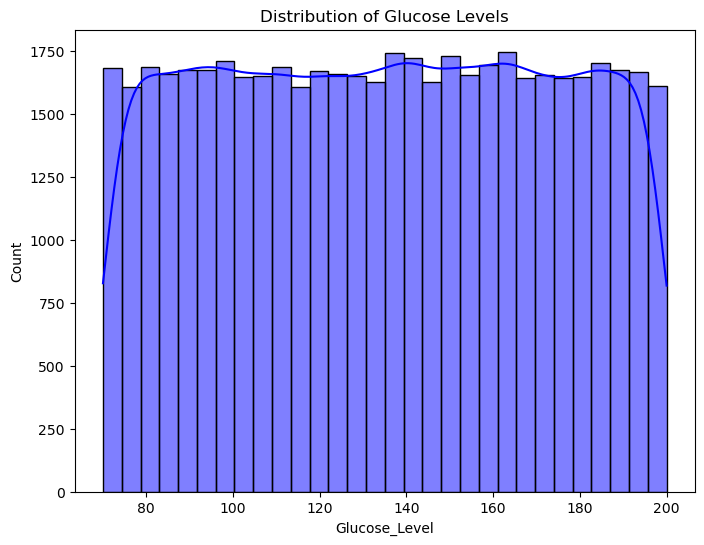

In [66]:
# Visualizations
plt.figure(figsize=(8,6))
sns.histplot(df['Glucose_Level'], kde=True, bins=30, color='blue')
plt.title('Distribution of Glucose Levels')
plt.show()

### Pairplot (Scatterplot Matrix)

In [ ]:
sns.pairplot(df)
plt.suptitle('Pairplot of Features', y=1.02)
plt.show()

### Distribution Plot (Histogram/Kernel Density Estimation)

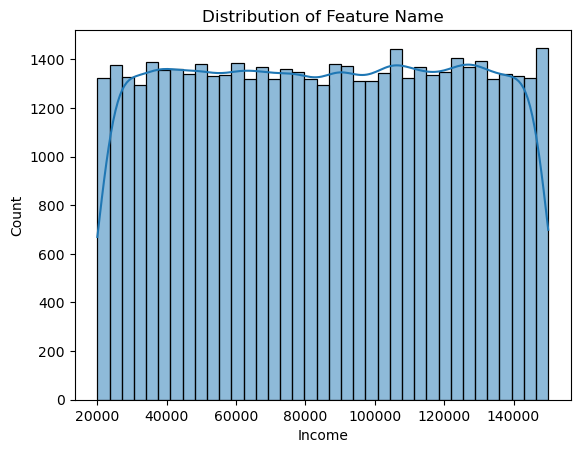

In [81]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Feature Name')
plt.show()

### Correlation Heatmap (with Mask for Upper Triangle)

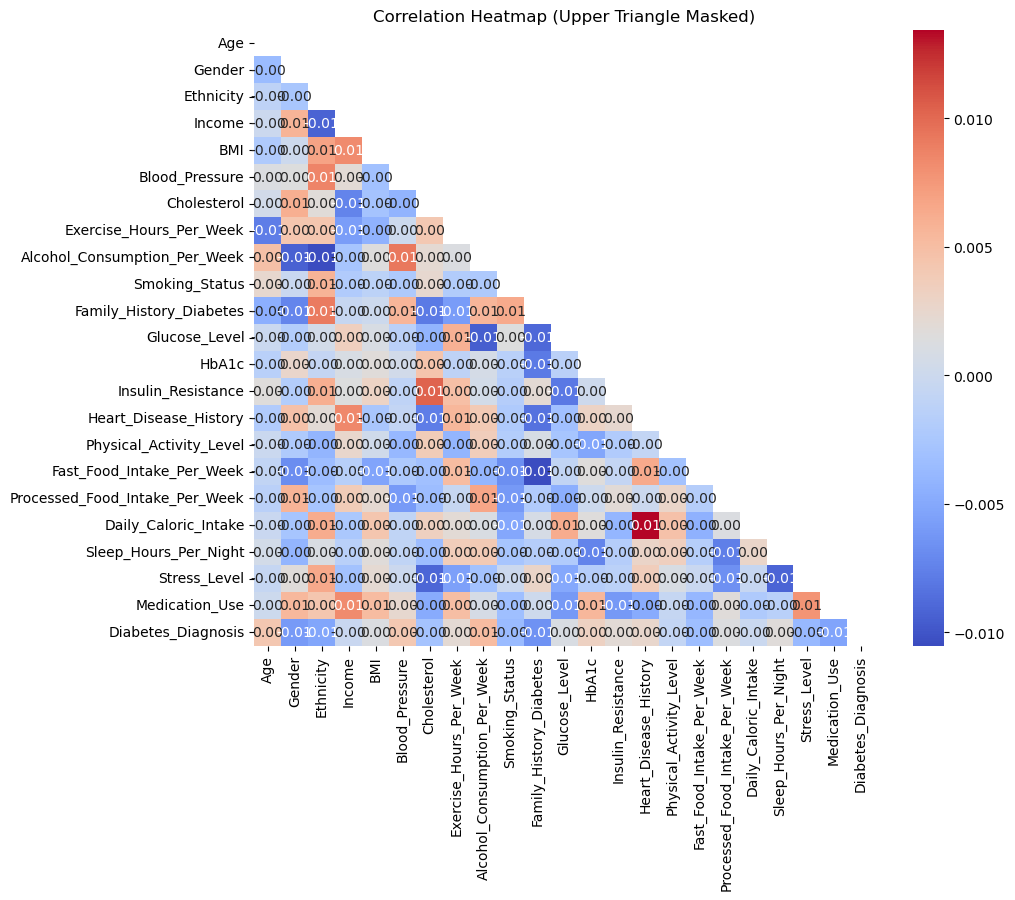

In [79]:
plt.figure(figsize=(10,8))
corr_matrix = df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))  # Mask the upper triangle
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', mask=mask)
plt.title('Correlation Heatmap (Upper Triangle Masked)')
plt.show()

### Pie Chart
A pie chart is useful for visualizing the proportions of categories in a dataset

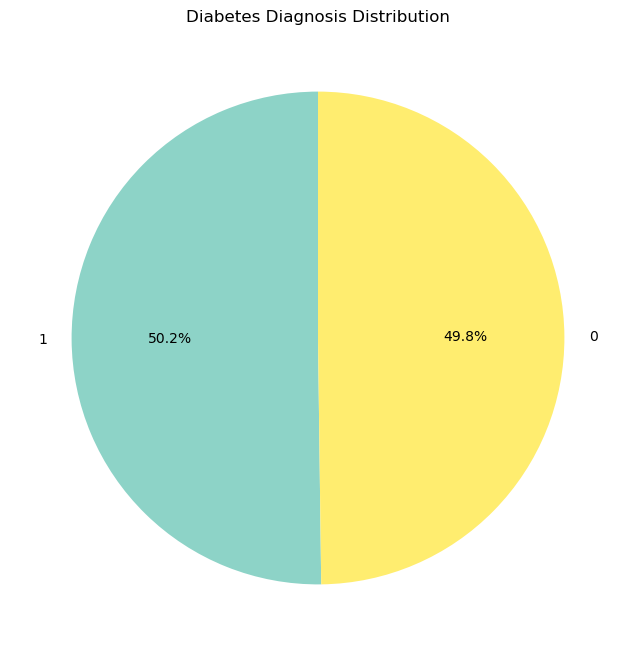

In [83]:
# Assuming 'Diabetes_Diagnosis' is a categorical column
category_counts = df['Diabetes_Diagnosis'].value_counts()

plt.figure(figsize=(8, 8))
category_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
plt.title('Diabetes Diagnosis Distribution')
plt.ylabel('')  # Hide y-axis label
plt.show()

In [ ]:
# Assuming 'Income_level' and 'Diabetes_Diagnosis' are categorical variables
plt.figure(figsize=(10, 6))
sns.countplot(x='Income', hue='Diabetes_Diagnosis', data=df, palette='Set2')  # Correct column names
plt.title('Income vs Diabetes Diagnosis')
plt.xlabel('Income')
plt.ylabel('Count')
plt.legend(title='Diabetes Diagnosis', loc='upper right')
plt.show()


C:\Users\5500\AppData\Local\Temp\ipykernel_35048\3791529489.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Diabetes_Diagnosis', y='Alcohol_Consumption_Per_Week', data=df, palette='Blues')


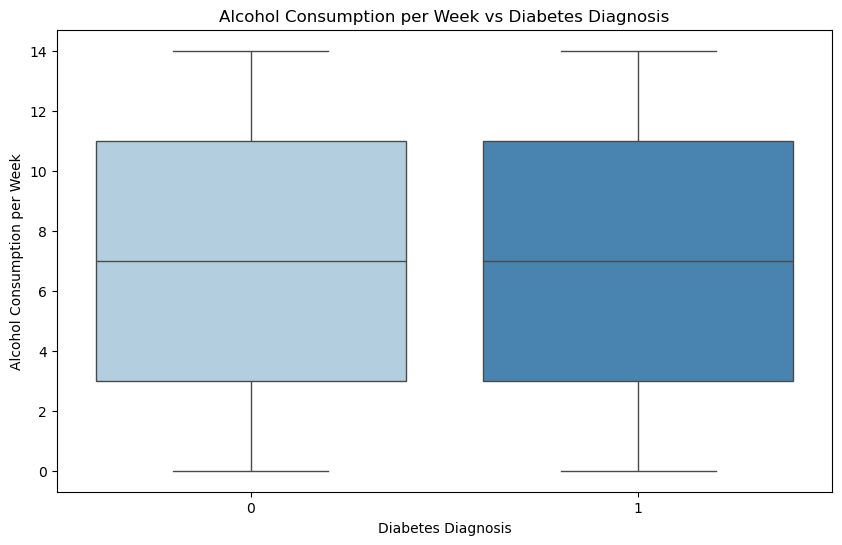

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Diabetes_Diagnosis', y='Alcohol_Consumption_Per_Week', data=df, palette='Blues')
plt.title('Alcohol Consumption per Week vs Diabetes Diagnosis')
plt.xlabel('Diabetes Diagnosis')
plt.ylabel('Alcohol Consumption per Week')
plt.show()


In [22]:
# Split data into training and test sets
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_scaled, y_classification, test_size=0.2, random_state=42)
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_scaled, y_regression, test_size=0.2, random_state=42)

In [24]:
# Train Classification Models
log_reg = LogisticRegression()
log_reg.fit(X_train_cls, y_train_cls)
rf_cls = RandomForestClassifier(n_estimators=100, random_state=42)
rf_cls.fit(X_train_cls, y_train_cls)

RandomForestClassifier(random_state=42)

In [26]:
# Classification Predictions & Evaluation
y_pred_log = log_reg.predict(X_test_cls)
y_pred_rf = rf_cls.predict(X_test_cls)

In [28]:
print("Logistic Regression Accuracy:", accuracy_score(y_test_cls, y_pred_log))
print("Random Forest Accuracy:", accuracy_score(y_test_cls, y_pred_rf))
print("Classification Report (Random Forest):\n", classification_report(y_test_cls, y_pred_rf))

Logistic Regression Accuracy: 0.4936
Random Forest Accuracy: 0.4986
Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.49      0.55      0.52      4884
           1       0.51      0.45      0.48      5116

    accuracy                           0.50     10000
   macro avg       0.50      0.50      0.50     10000
weighted avg       0.50      0.50      0.50     10000



In [30]:
# Train Regression Models
lin_reg = LinearRegression()
lin_reg.fit(X_train_reg, y_train_reg)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [31]:
# Regression Predictions & Evaluation
y_pred_lin = lin_reg.predict(X_test_reg)
y_pred_rf_reg = rf_reg.predict(X_test_reg)

In [33]:
print("Linear Regression R2 Score:", r2_score(y_test_reg, y_pred_lin))
print("Random Forest R2 Score:", r2_score(y_test_reg, y_pred_rf_reg))
print("Random Forest Mean Absolute Error:", mean_absolute_error(y_test_reg, y_pred_rf_reg))

Linear Regression R2 Score: -0.00041387644922852296
Random Forest R2 Score: -0.011755639250636163
Random Forest Mean Absolute Error: 32.60214250000001
